In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [45]:
#Import the required libraries and load the data
df = pd.read_csv('D:\\UnsupervisedLearning/renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
 # Data cleansing and Exploratory data analysis
df.duplicated().sum()
df[df.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


In [5]:
df.drop_duplicates(inplace=True)

In [ ]:
#I Have not found any columns redundant for analysis.

In [6]:
df['weight']=df['weight'].replace(regex=['lbs'],value='')


In [7]:
df['weight']=df['weight'].astype(float)

In [8]:
df['weight'].dtypes

dtype('float64')

In [38]:
df.pivot_table(index = ['rented for'], aggfunc ='size')



rented for
date                7388
everyday           16822
formal affair      40408
other              15388
party              35626
party: cocktail        1
vacation            4075
wedding            57784
work               15042
dtype: int64

In [45]:
df['rented for']=df['rented for'].replace('party: cocktail','party')

In [46]:
df.pivot_table(index=['rented for'] , aggfunc='size')

rented for
date              7388
everyday         16822
formal affair    40408
other            15388
party            35627
vacation          4075
wedding          57784
work             15042
dtype: int64

In [47]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [59]:
df['height_quote']=df['height'].replace(regex=['"'],value='')

   

In [63]:
df['quotes_removal']=df['height_quote'].replace(regex=["'"],value='')

In [65]:
df['spaceremoval']=df['quotes_removal'].replace(regex=[" "],value='')

In [67]:
df['height']=(df['spaceremoval']*12).astype(float)

In [73]:
df.drop(['height_quote','quotes_removal','spaceremoval'],axis=1,inplace=True)

In [75]:
df.dtypes

Unnamed: 0          int64
fit                object
user_id             int64
bust size          object
item_id             int64
weight            float64
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size                int64
age               float64
review_date        object
dtype: object

In [76]:
df.isnull()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192542,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
df.fillna(0)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,5.858586e+23,14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,5.656566e+23,12,36.0,"June 18, 2013"
2,2,fit,360448,0,1063761,0.0,10.0,party,This hugged in all the right places! It was a ...,0,It was a great time to celebrate the (almost) ...,sheath,5.454545e+23,4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,5.555556e+23,8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,5.959596e+23,12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,192539,fit,66386,34dd,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,5.959596e+23,8,42.0,"May 18, 2016"
192540,192540,fit,118398,32c,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,5.151515e+23,4,29.0,"September 30, 2016"
192541,192541,fit,47002,36a,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,5.858586e+23,8,31.0,"March 4, 2016"
192542,192542,fit,961120,36c,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,5.656566e+23,16,31.0,"November 25, 2015"


In [9]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])


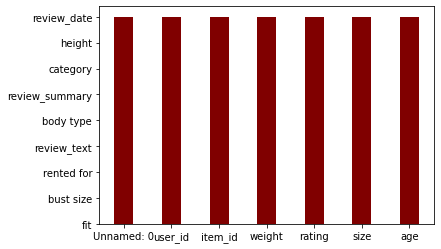

In [10]:
for i in numeric_data.columns:
    for j in categorical_data.columns:
        plt.bar(i, j, color ='maroon',
        width = 0.4)

<AxesSubplot:xlabel='age'>

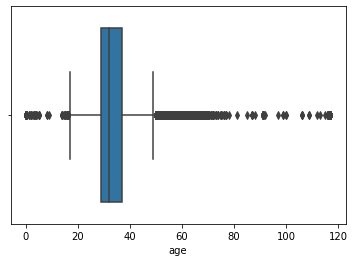

In [95]:
import seaborn as sns
sns.boxplot(df['age'])

In [133]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [134]:
print(lower,upper)

17.0 49.0


In [140]:
upper_array = np.where(df['age']>=upper)[0]
lower_array = np.where(df['age']<=lower)[0]
print(lower_array,upper_array)

[   133    891   1490   1975   2950   3268   4358   5472   5678   6055
   6248   6493   8012   8352   8945   9980  10882  11661  12123  12661
  12678  13468  14616  14732  14788  15668  17223  17325  18172  18176
  18371  19768  20924  20978  21369  22675  23233  23352  23389  24486
  24813  25287  26521  27070  28016  28026  28587  30025  30358  30976
  32696  33337  34019  34293  37540  37933  38688  39128  40195  40222
  40278  41080  42398  42961  43043  46124  46365  46712  49611  51043
  54433  54749  56660  57728  58275  59602  59654  59735  60750  61329
  62252  62696  63036  63703  63931  64131  64480  64831  65525  65714
  65835  66303  66311  66603  66911  67171  67257  67644  67865  68373
  69170  69257  69748  70392  75247  75799  78221  78509  78523  79155
  79183  79807  80233  80651  80972  81337  81529  82473  83389  83815
  85010  86222  87771  88295  88657  89125  90420  90908  92157  92930
  94129  94758  94946  95693  97183  97434  97622  99617  99811 100256
 10063

In [141]:
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

KeyError: '[ 65614 183799 190312] not found in axis'

<AxesSubplot:xlabel='age'>

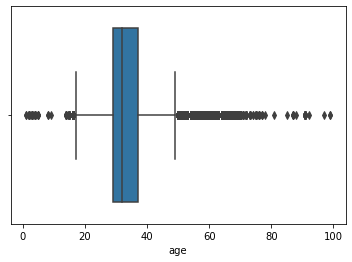

In [142]:
sns.boxplot(df['age'])

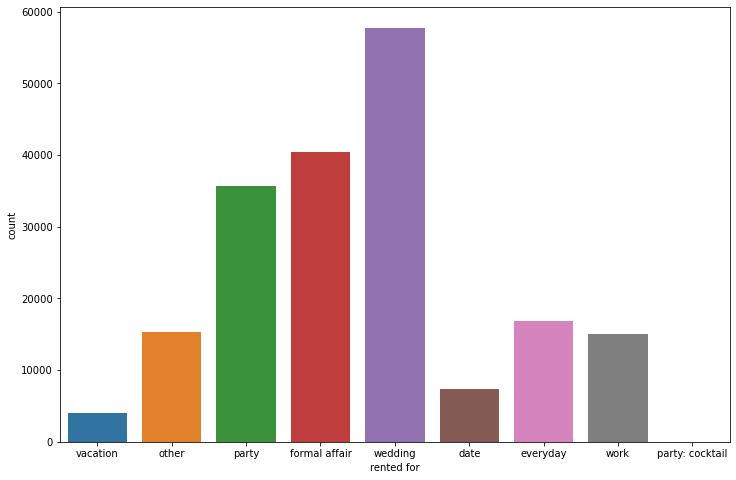

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(df['rented for'])
plt.show()

In [94]:
df.drop(df.index[(df['rented for'] == "vacation")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "other")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "date")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "everyday")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "work")],axis=0,inplace=True)
df.shape

(192544, 16)

In [98]:
#dropping the respective rows
df.drop(df.index[(df['age'] >= 100)],axis=0,inplace=True)
df.drop(df.index[(df['age'] == 0)],axis=0,inplace=True)
ratio_age_greater_than_100 = (len(df[df['age'] > 100])/len(df['age']))*100
ratio_age_equal_to_100 = (len(df[df['age'] == 0])/len(df['age']))*100
print(ratio_age_greater_than_100,ratio_age_equal_to_100)

0.0 0.0


In [95]:
## Label encoding
df_cat = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [89]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,0,420272,39,2260466,37,10.0,6,4364,3,109622,44,16,14,28.0,77
1,1,0,273551,37,153475,32,10.0,3,61040,6,59681,20,14,12,36.0,1189
2,2,0,360448,106,1063761,190,10.0,4,162991,7,74243,45,12,4,116.0,411
3,3,0,909926,38,126335,35,8.0,2,63856,4,28142,16,13,8,34.0,607
4,4,0,151944,37,616682,45,10.0,7,42647,1,140372,20,17,12,27.0,2205


In [158]:
#dropping the respective rows
df.drop(df.index[(df['fit'] == "small")],axis=0,inplace=True)
df.drop(df.index[(df['fit'] == "large")],axis=0,inplace=True)
df.shape

(192453, 16)

In [159]:
df.drop(df.index[(df['rented for'] == "vacation")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "other")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "date")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "everyday")],axis=0,inplace=True)
df.drop(df.index[(df['rented for'] == "work")],axis=0,inplace=True)
df.shape

(192453, 16)

In [160]:
#standardisation
df_scaled = df.copy()
scaled_features = StandardScaler().fit_transform(df_scaled.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df_scaled.index, columns=df_scaled.columns)


In [161]:
scaled_features_df

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,-1.732029,-0.556331,-0.274165,-0.296059,1.508335,-0.419986,0.634719,0.664332,-1.648127,-0.142432,0.748749,1.569218,1.128810,0.206530,-0.739609,-1.650491
1,-1.732011,-0.556331,-0.781751,-0.385095,-1.107889,-0.504445,0.634719,-0.536508,-0.623248,1.434302,-0.373551,-0.307267,0.455538,-0.028933,0.272382,0.009305
3,-1.731975,-0.556331,1.419806,-0.340577,-1.141589,-0.453769,-0.763780,-0.936788,-0.572326,0.383146,-1.082312,-0.620015,0.118903,-0.499859,0.019384,-0.859401
4,-1.731957,-0.556331,-1.202453,-0.385095,-0.532731,-0.284851,0.634719,1.064612,-0.955851,-1.193589,1.439780,-0.307267,1.465445,-0.028933,-0.866108,1.525810
5,-1.731939,-0.556331,0.814119,-0.963830,-0.846369,-0.403094,-0.763780,-1.737348,-1.523824,-1.193589,1.313799,-0.620015,1.128810,-0.499859,1.410872,-1.551978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,1.731889,-0.556331,-1.498444,-0.207023,1.498831,-0.369310,0.634719,1.464892,-1.412540,-0.142432,0.015268,0.161854,1.465445,-0.499859,1.031375,0.560083
192540,1.731907,-0.556331,-1.318507,-0.919312,-0.451573,-1.044983,0.634719,1.464892,0.776602,0.908724,0.019066,-0.620015,-1.900912,-0.970784,-0.613110,1.572081
192541,1.731925,-0.556331,-1.565503,0.104604,-0.450073,-0.453769,-2.162280,-1.337068,-0.000212,1.434302,0.078798,-0.620015,1.128810,-0.499859,-0.360112,0.422762
192542,1.731943,-0.556331,1.596913,0.238158,-1.141589,0.052985,0.634719,1.064612,1.057271,0.383146,1.679000,-0.620015,0.455538,0.441993,-0.360112,0.931746


In [162]:
from sklearn.decomposition import PCA

In [163]:
df=df.dropna()

In [164]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df)
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    return pca_result, explained_variance_ratio

In [165]:
def find_optimal_n_components(df, variance_threshold):
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance_ratio_cumsum >= variance_threshold) + 1
    return n_components

In [166]:
pc_result,explained_Variance_ratio=apply_pca(df,2)

In [199]:
print(pc_result,explained_Variance_ratio)

[[1214771.6275234   -78160.44537492]
 [-892051.80201013 -227076.69446365]
 [-919916.98743288  409271.86935437]
 ...
 [-362005.39410623 -452933.97637814]
 [-919766.32079939  460672.53048783]
 [-917410.69822919 -376820.08236383]] 0.9890241452359434


In [205]:
def apply_kmeans(pca_result, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    return cluster_labels

In [207]:
result=apply_kmeans(pc_result,10)
result

array([6, 5, 1, ..., 3, 1, 5])

In [202]:
def apply_agglomerative(data, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(data)
    return cluster_labels